In [1]:
# importar libreria
#Se dbeen realizar algunos ajustes para tener una curva mas ajustada
#4
import numpy as np
import math
import matplotlib.pyplot as plt

#Probabilidad ruleta rusa


se tiene una ruleta rusa con 9 casillas y en la casilla 5 esta la bala

In [2]:
listp=[] # lista de probabilidaddes
listn=[] #lista de tiros
for i in range(10000):
  n=10*(i+1)
  disparo = np.random.randint(1,10,n) # numero aleatorio de 1 a 9 
  mask_b=disparo==5 # en la casilla 5 esta la bala de verdad
  listp.append(mask_b.sum()/n) # datos favorables sobre casos posibles
  listn.append(n)

(0.05, 0.15)

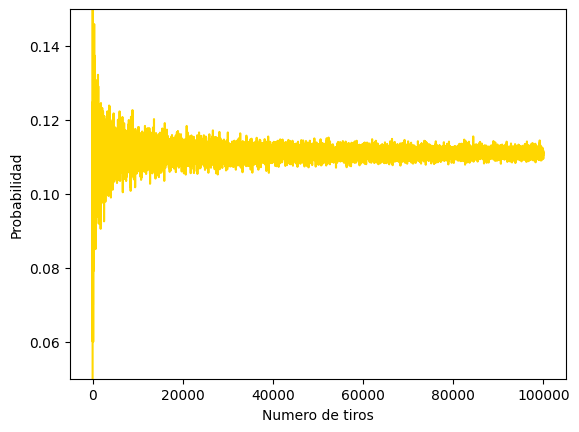

In [3]:
#grafica
import matplotlib.pyplot as plt
plt.plot(listn,listp, color= "gold")
plt.xlabel("Numero de tiros")
plt.ylabel("Probabilidad")
plt.ylim(0.05,0.15)

# Modelo de ISING
graficar como es el calor especifico de un material ferromagnetico con la temperatura.
1. considerar una particula LxL con espin +-1
inicializo el sistema 2x2, es decir 4 particulas con spin arriba, abajo
hay un factor de escala $H=-J \sum{}{_{<i,j>}} σ_{i} \sigma_j$ 

$P(\sigma_i =+1)= \frac{1}{1+e^{-B \sigma h}} $
donde $B=\frac{1}{T}$, $\sigma=2$, $h= \sum_{i}{\sigma _i}$


Calor especifico $(Cv) = \frac{B^2}{N}( <E^2>-<E>^2)$



1. generar la matriz.
2. definir un corte = random entre 0,1
3. Probabilidad
4. Cambiar valor de $\sigma$
5. Calor especifico

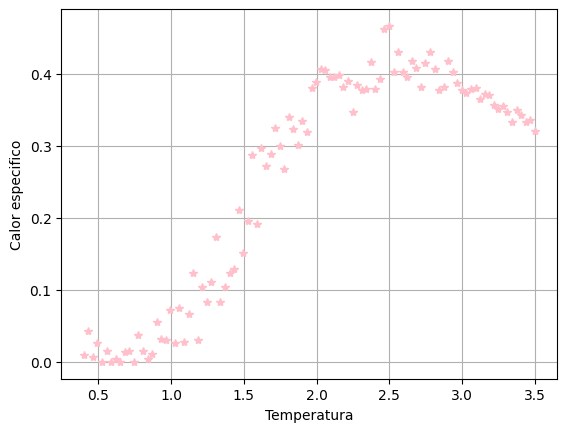

In [4]:
#1.generar la matriz
L = 2
def SPIN():
    s= np.random.choice([-1, 1], size=(L, L))
    return s
J = 1.0 
def ENERGIA(spin):
    E = 0   
    for i in range(L):
        for j in range(L):
            E = E+( -J * spin[i,j] * (spin[(i+1)%L,j] + spin[i,(j+1)%L])) 
    return E 
#cambiar valor 
kb = 1.0
def CAMBIO_SPIN(spin, T):
    i, j = np.random.randint(0, L, size=2)
    ener_ant = ENERGIA(spin)
    spin[i,j] = spin[i,j] *(-1)
    ener_nuev = ENERGIA(spin)
    if ener_nuev <ener_ant: 
        return spin, ener_nuev 
    else:
        probabilidad=np.exp(-(ener_nuev - ener_ant) / (kb * T))
        if np.random.rand()<probabilidad:
            return spin, ener_nuev
        else:
            spin[i,j] = spin[i,j]*(-1)  
            return spin, ener_ant  

 #calor especifico
def CALOR_ESPECIFICO(energias, T):  
    Ener_prom = np.mean(energias)  
    Ener_prom2 = np.mean(energias**2)  
    b = (1)/(kb* T)
    Cv = ((b**2)*(Ener_prom2-Ener_prom**2))/(L**2)   
    return Cv    

temperaturas = np.linspace(0.4, 3.5, 100)  
Calores = []   
for T in temperaturas:
    spin = SPIN()
    energias = []
    for step in range(10000):
        spin, E = CAMBIO_SPIN(spin, T)
        energias.append(E)           
    C = CALOR_ESPECIFICO(np.array(energias), T)  
    Calores.append(C)

#graficar
plt.plot(temperaturas, Calores,"*", color="pink")  
plt.xlabel('Temperatura')
plt.ylabel('Calor especifico')
plt.grid()
plt.show()
